# Challenge 1

Select 14 stocks, analyze the risk/return and correlation, and then determine the best 5 to invest in long-term.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [2]:
# Downloading stocks
tickers = ['AAPL', 'NVDA', 'PFE', 'AZN', 'GOOG', 'MSFT', 'TSLA', 'CVX', 'XOM', 'RCL', 'CCL', 'MAR', 'VRTX', 'REGN']
stocks = yf.download(tickers, start='2010-01-01')
stocks

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


Price            Close                                                \
Ticker            AAPL        AZN        CCL         CVX        GOOG   
Date                                                                   
2010-01-04    6.440331  12.886744  23.892754   43.122471   15.536651   
2010-01-05    6.451467  12.625806  24.123787   43.427940   15.468233   
2010-01-06    6.348846  12.525231  23.691538   43.433380   15.078297   
2010-01-07    6.337110  12.661138  23.952372   43.269753   14.727283   
2010-01-08    6.379240  12.715500  24.757242   43.346107   14.923613   
...                ...        ...        ...         ...         ...   
2025-03-12  216.979996  75.570000  19.500000  152.669998  169.000000   
2025-03-13  209.679993  76.510002  19.120001  153.610001  164.729996   
2025-03-14  213.490005  77.599998  19.920000  157.020004  167.619995   
2025-03-17  214.000000  77.370003  20.889999  158.720001  166.570007   
2025-03-18  212.690002  77.070000  20.120001  160.809998  162.669998   

Price                                                                  ...  \
Ticker             MAR        MSFT        NVDA        PFE         RCL  ...   
Date                                                                   ...   
2010-01-04   22.206877   23.254051    0.423884   9.868690   21.504263  ...   
2010-01-05   22.335468   23.261562    0.430073   9.727929   21.579273  ...   
2010-01-06   22.399765   23.118809    0.432824   9.696650   21.037504  ...   
2010-01-07   22.488184   22.878382    0.424342   9.660160   21.420916  ...   
2010-01-08   22.536400   23.036163    0.425259   9.738358   21.595951  ...   
...                ...         ...         ...        ...         ...  ...   
2025-03-12  243.809998  383.269989  115.739998  25.709999  207.360001  ...   
2025-03-13  237.289993  378.769989  115.580002  25.600000  207.899994  ...   
2025-03-14  243.110001  388.559998  121.669998  25.719999  212.020004  ...   
2025-03-17  248.110001  388.700012  119.529999  26.049999  219.410004  ...   
2025-03-18  240.389999  383.519989  115.430000  26.309999  203.380005  ...   

Price          Volume                                                   \
Ticker           GOOG      MAR      MSFT       NVDA       PFE      RCL   
Date                                                                     
2010-01-04   78541293  2860350  38409100  800204000  54898644  2792600   
2010-01-05  120638494  2627885  49749600  728648000  45714931  3588900   
2010-01-06  159744526  2789900  58182400  649168000  43640975  4139600   
2010-01-07  257533695  2560724  50559700  547792000  41557112  3156200   
2010-01-08  189680313  3961031  51197400  478168000  32049716  2507700   
...               ...      ...       ...        ...       ...      ...   
2025-03-12   19880100  2349800  24253600  323857500  37331000  3239800   
2025-03-13   15206200  2026600  20473000  299033100  36717900  4963000   
2025-03-14   18611100  1414000  19952800  277593500  30298300  2382500   
2025-03-17   17839100  1971900  22474300  255501500  32676900  2660000   
2025-03-18   24573811  1237168  17266696  295197830  27204653  3006518   

Price                                                
Ticker         REGN         TSLA     VRTX       XOM  
Date                                                 
2010-01-04   510300          NaN  1744900  27809100  
2010-01-05   628300          NaN  2456500  30174700  
2010-01-06   599300          NaN  2313700  35044700  
2010-01-07   433900          NaN  1873200  27192100  
2010-01-08   445200          NaN  3687900  24891800  
...             ...          ...      ...       ...  
2025-03-12   808300  142215700.0  1368700  14051500  
2025-03-13   863700  114813500.0  1699800  17767800  
2025-03-14  1306000  100242300.0  1386500  15890100  
2025-03-17   942900  111900600.0  1108800  19908800  
2025-03-18   607935  106983776.0  1249743  15607533  

[3825 rows x 70 columns]

In [3]:
# Extracting closing prices

close = stocks.Close.copy().dropna()
close

Ticker,AAPL,AZN,CCL,CVX,GOOG,MAR,MSFT,NVDA,PFE,RCL,REGN,TSLA,VRTX,XOM
Date,,,,,,,,,,,,,,
2010-06-29,7.709081,13.749909,22.589527,37.994614,11.260756,24.691248,17.675093,0.240254,7.594028,19.220480,22.950506,1.592667,33.060001,32.678852
2010-06-30,7.569440,13.295717,22.664474,37.716702,11.029967,24.127161,17.447620,0.234064,7.583390,18.978769,22.291353,1.588667,32.900002,32.553368
2010-07-01,7.477656,13.414198,23.466429,37.505508,10.894619,24.272213,17.561348,0.237962,7.567437,19.562210,20.763319,1.464000,32.299999,32.290977
2010-07-02,7.431313,13.273149,22.949286,37.411018,10.821739,23.812868,17.644762,0.234981,7.519576,19.128790,21.582266,1.280000,32.220001,32.268166
2010-07-06,7.482172,13.476265,22.851854,37.549965,10.809839,23.571127,18.061808,0.232460,7.599345,19.187132,21.332586,1.074000,32.169998,32.775829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,216.979996,75.570000,19.500000,152.669998,169.000000,243.809998,383.269989,115.739998,25.709999,207.360001,689.500000,248.089996,495.420013,109.129997
2025-03-13,209.679993,76.510002,19.120001,153.610001,164.729996,237.289993,378.769989,115.580002,25.600000,207.899994,680.609985,240.679993,502.920013,108.669998
2025-03-14,213.490005,77.599998,19.920000,157.020004,167.619995,243.110001,388.559998,121.669998,25.719999,212.020004,666.869995,249.979996,504.769989,111.900002


In [4]:
# Normalizing closing prices for easier analysis

normClose = close / close.iloc[0] * 100
normClose

Ticker,AAPL,AZN,CCL,CVX,GOOG,MAR,MSFT,NVDA,PFE,RCL,REGN,TSLA,VRTX,XOM
Date,,,,,,,,,,,,,,
2010-06-29,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-06-30,98.188625,96.696763,100.331779,99.268549,97.950508,97.715438,98.713035,97.423660,99.859926,98.742432,97.127937,99.748852,99.516032,99.616007
2010-07-01,96.998023,97.558446,103.881895,98.712699,96.748561,98.302901,99.356469,99.045796,99.649852,101.777948,90.469983,91.921287,97.701143,98.813072
2010-07-02,96.396877,96.532625,101.592589,98.464005,96.101360,96.442546,99.828399,97.805359,99.019599,99.522956,94.038300,80.368337,97.459165,98.743265
2010-07-06,97.056605,98.009845,101.161278,98.829706,95.995684,95.463490,102.187909,96.755734,100.070025,99.826497,92.950395,67.434059,97.307915,100.296758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,2814.602730,549.603619,86.323188,401.820110,1500.787398,987.434893,2168.418551,48173.982112,338.555516,1078.849233,3004.291033,15577.016344,1498.548073,333.946850
2025-03-13,2719.909169,556.440046,84.640996,404.294151,1462.868057,961.028757,2142.958996,48107.387623,337.107027,1081.658701,2965.555440,15111.758777,1521.234097,332.539215
2025-03-14,2769.331570,564.367344,88.182457,413.269117,1488.532404,984.599892,2198.347721,50642.201689,338.687202,1103.094224,2905.687522,15695.685181,1526.829909,342.423293


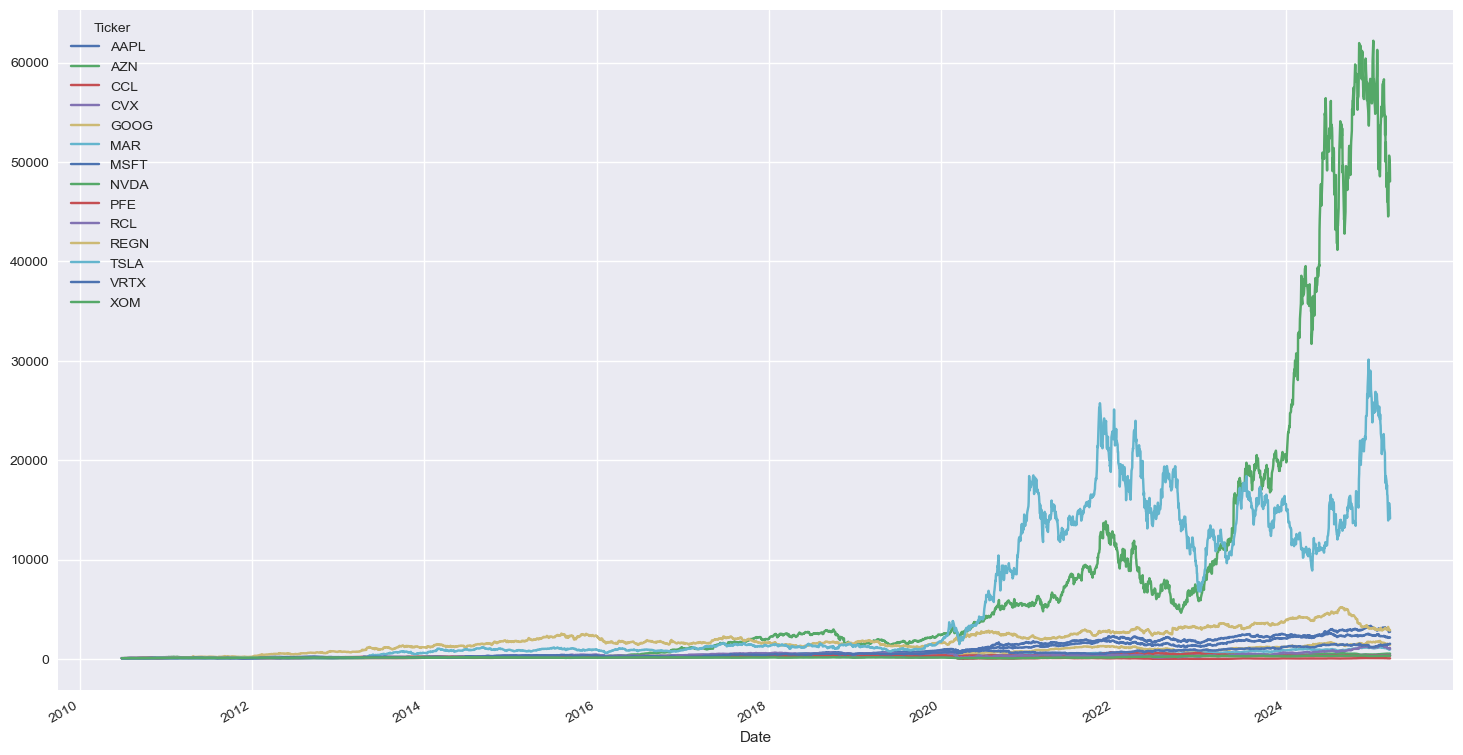

In [5]:
normClose.plot(figsize=(18, 10))
plt.show()

In [6]:
# Calculating daily percentage returns

dailyReturn = close.pct_change().dropna() * 100
dailyReturn

Ticker,AAPL,AZN,CCL,CVX,GOOG,MAR,MSFT,NVDA,PFE,RCL,REGN,TSLA,VRTX,XOM
Date,,,,,,,,,,,,,,
2010-06-30,-1.811375,-3.303237,0.331779,-0.731451,-2.049492,-2.284562,-1.286965,-2.576340,-0.140074,-1.257568,-2.872063,-0.251148,-0.483968,-0.383993
2010-07-01,-1.212566,0.891119,3.538376,-0.559946,-1.227096,0.601198,0.651823,1.665033,-0.210368,3.074176,-6.854829,-7.847274,-1.823715,-0.806031
2010-07-02,-0.619751,-1.051493,-2.203758,-0.251936,-0.668952,-1.892472,0.474987,-1.252388,-0.632467,-2.215599,3.944200,-12.568307,-0.247672,-0.070645
2010-07-06,0.684387,1.530281,-0.424550,0.371405,-0.109963,-1.015170,2.363566,-1.073178,1.060826,0.304996,-1.156874,-16.093748,-0.155193,1.573265
2010-07-07,4.038142,1.172276,3.509329,2.797522,3.240309,5.128160,2.015103,4.832378,2.309295,4.735037,1.498129,-1.924298,2.704392,1.688143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,-1.747872,1.791490,2.094239,-0.915111,1.819499,-1.014981,0.741221,6.427584,-1.077340,0.091713,-3.990751,7.593891,1.449813,-0.027488
2025-03-13,-3.364367,1.243883,-1.948714,0.615709,-2.526630,-2.674215,-1.174107,-0.138237,-0.427844,0.260413,-1.289342,-2.986821,1.513867,-0.421515
2025-03-14,1.817061,1.424646,4.184096,2.219910,1.754386,2.452698,2.584684,5.269074,0.468746,1.981727,-2.018776,3.864053,0.367847,2.972305


In [7]:
# Calculating mean return and standard deviation of stocks
dailySummary = dailyReturn.describe().T[['mean', 'std']]
dailySummary

,mean,std
Ticker,,
AAPL,0.104944,1.748313
AZN,0.057587,1.482092
CCL,0.043974,3.047206
CVX,0.053356,1.690671
GOOG,0.087001,1.726373
MAR,0.080020,1.927230
MSFT,0.096194,1.614767
NVDA,0.208272,2.888498
PFE,0.042927,1.369529


In [8]:
# Calculating annual mean return and standard deviation
annualSummary = dailySummary * [252, np.sqrt(252)]
annualSummary

,mean,std
Ticker,,
AAPL,26.445801,27.753611
AZN,14.511944,23.527476
CCL,11.081534,48.372888
CVX,13.445686,26.838577
GOOG,21.924362,27.405314
MAR,20.165021,30.593828
MSFT,24.240766,25.633632
NVDA,52.484638,45.853483
PFE,10.817661,21.740593


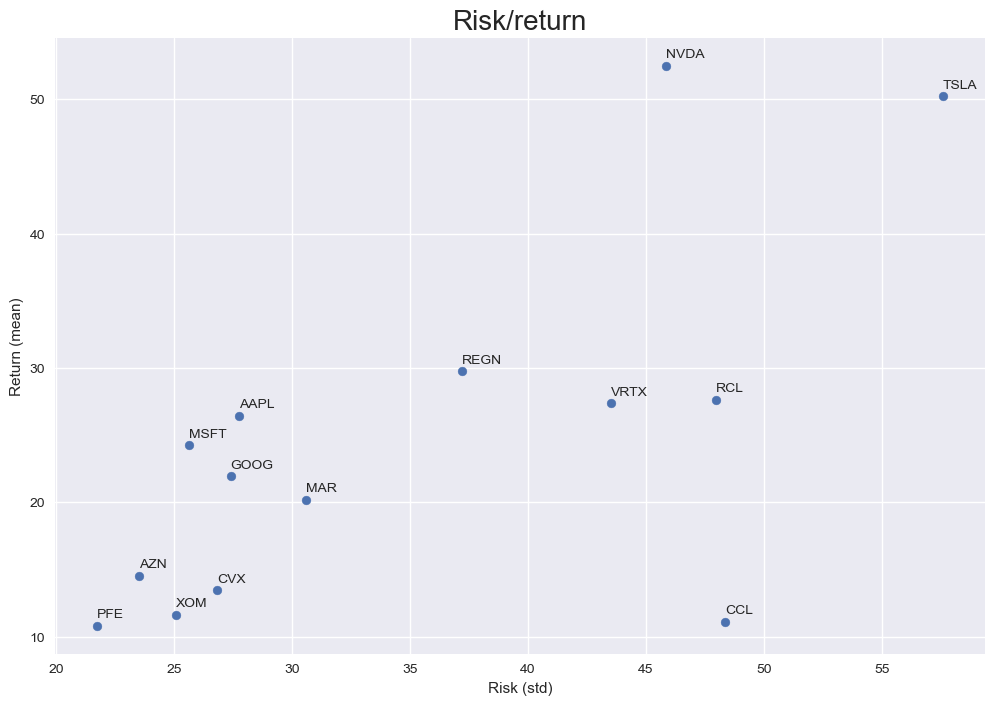

In [9]:
# Plotting risk/return

annualSummary.plot.scatter(x='std', y='mean', figsize=(12, 8), s=40)

for label in annualSummary.index:
    plt.annotate(label, tuple(annualSummary.loc[label])[::-1], textcoords='offset points', xytext=(0, 6))

plt.xlabel('Risk (std)')
plt.ylabel('Return (mean)')
plt.title('Risk/return', fontsize=20)
plt.show()

Just from the risk/return plot, we can select the best stocks between relatively high and low risk.

High risk:
- NVDA
- REGN
- RCL

Low risk:
- AZN
- MSFT
- AAPL
- GOOG

Now let's analyze their correlations.


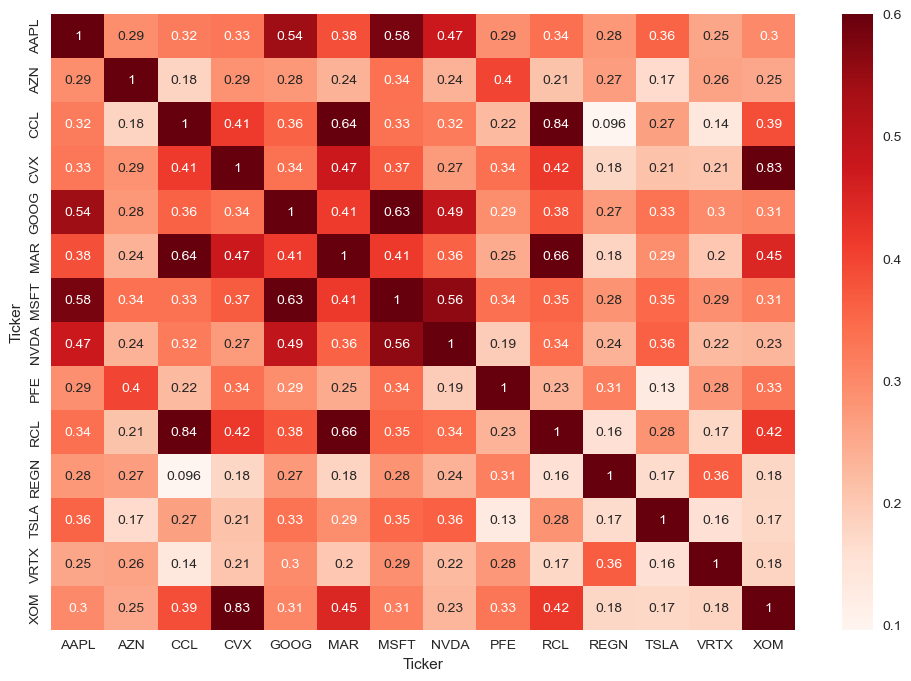

In [10]:
# Creating correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(dailyReturn.corr(), cmap='Reds', annot=True, vmax=0.6)
plt.show()

From just the correlation heatmap alone, we might want to select the stocks with the lowest correlations. For example Regeneron (REGN) and Carnival (CCL). However, if we refer back to our risk/return plot, we see that Carnival's return is exceptionally lackluster when compared to its high risk. Thus, we'd want to avoid CCL.

Regeneron appears to have low correlations with all other stocks, so let's build our portfolio around it.

To introduce high profit with high risk, let's add Nvidia.

But to hedge, we can use AstraZeneca, Microsoft, and Chevron.

Thus, our final portfolio consists of Regeneron, Chevron, Nvidia, AstraZeneca, and Microsoft.

# Challenge 2

Take the 5 stocks and plot moving averages

In [11]:
# Create dataframe of 5 stocks
tickers = ['REGN', 'CVX', 'NVDA', 'AZN', 'MSFT']
stocksFive = yf.download(tickers, start='2024-06-01')
stocksFive

[*********************100%***********************]  5 of 5 completed


Price           Close                                                   \
Ticker            AZN         CVX        MSFT        NVDA         REGN   
Date                                                                     
2024-06-03  77.401878  152.453842  411.127045  114.962219   988.210083   
2024-06-04  78.411171  151.166122  413.662323  116.398750   992.015198   
2024-06-05  78.705139  150.052673  421.556366  122.399780  1004.579041   
2024-06-06  79.204887  150.972488  422.063385  120.958252   999.505554   
2024-06-07  78.411171  151.117706  421.397308  120.848289  1001.662842   
...               ...         ...         ...         ...          ...   
2025-03-12  75.570000  152.669998  383.269989  115.739998   689.500000   
2025-03-13  76.510002  153.610001  378.769989  115.580002   680.609985   
2025-03-14  77.599998  157.020004  388.559998  121.669998   666.869995   
2025-03-17  77.370003  158.720001  388.700012  119.529999   678.419983   
2025-03-18  77.070000  160.809998  383.519989  115.430000   664.960022   

Price            High                                                   ...  \
Ticker            AZN         CVX        MSFT        NVDA         REGN  ...   
Date                                                                    ...   
2024-06-03  77.872231  156.539661  414.020209  114.962219   999.755244  ...   
2024-06-04  78.460169  151.379129  414.030177  116.561699   998.866440  ...   
2024-06-05  79.048101  152.027823  421.625938  122.408772  1013.697328  ...   
2024-06-06  79.234283  151.059638  422.848822  125.545741  1014.696055  ...   
2024-06-07  78.901118  152.676520  423.813239  121.652026  1006.137073  ...   
...               ...         ...         ...         ...          ...  ...   
2025-03-12  75.790001  154.789993  385.220001  116.760002   712.460022  ...   
2025-03-13  77.029999  154.429993  385.320007  117.760002   698.950012  ...   
2025-03-14  77.690002  157.240005  390.230011  121.879997   686.979980  ...   
2025-03-17  77.760002  159.449997  392.709991  122.889999   679.830017  ...   
2025-03-18  77.519997  161.080002  387.369995  119.019997   678.270020  ...   

Price            Open                                                   \
Ticker            AZN         CVX        MSFT        NVDA         REGN   
Date                                                                     
2024-06-03  76.921732  156.355714  413.125423  113.583674   978.902037   
2024-06-04  77.901629  150.769154  410.043372  115.677994   988.519690   
2024-06-05  78.793334  151.195165  415.392232  118.332117   992.165001   
2024-06-06  79.008904  149.587960  421.556357  124.007245  1003.899932   
2024-06-07  78.695341  150.759475  423.733716  119.730653   997.717899   
...               ...         ...         ...         ...          ...   
2025-03-12  75.269997  153.639999  382.950012  114.120003   709.940002   
2025-03-13  76.699997  152.259995  383.160004  117.029999   687.429993   
2025-03-14  76.870003  153.990005  379.779999  118.610001   680.609985   
2025-03-17  77.160004  157.220001  386.700012  122.739998   668.260010   
2025-03-18  77.447403  159.740005  387.279999  118.050003   678.000000   

Price        Volume                                         
Ticker          AZN      CVX      MSFT       NVDA     REGN  
Date                                                        
2024-06-03  5469000  9009900  17484700  438392000   533000  
2024-06-04  3959300  6360500  14348900  403324000   340400  
2024-06-05  4258700  7058500  16988000  528402000   385500  
2024-06-06  3091800  5215100  14861300  664696000   439700  
2024-06-07  2213300  5887700  13621700  412386000   250100  
...             ...      ...       ...        ...      ...  
2025-03-12  6674700  9710200  24253600  323857500   808300  
2025-03-13  7430900  9022800  20473000  299033100   863700  
2025-03-14  5974000  6671500  19952800  277593500  1306000  
2025-03-17  3867700  7615200  22474300  255501500   942900  
2025-03-18  3391321  79140

In [12]:
closeFive = stocksFive.Close.copy().dropna()
closeFive

Ticker,AZN,CVX,MSFT,NVDA,REGN
Date,,,,,
2024-06-03,77.401878,152.453842,411.127045,114.962219,988.210083
2024-06-04,78.411171,151.166122,413.662323,116.398750,992.015198
2024-06-05,78.705139,150.052673,421.556366,122.399780,1004.579041
2024-06-06,79.204887,150.972488,422.063385,120.958252,999.505554
2024-06-07,78.411171,151.117706,421.397308,120.848289,1001.662842
...,...,...,...,...,...
2025-03-12,75.570000,152.669998,383.269989,115.739998,689.500000
2025-03-13,76.510002,153.610001,378.769989,115.580002,680.609985
2025-03-14,77.599998,157.020004,388.559998,121.669998,666.869995


In [13]:
SMA50 = closeFive.rolling(window=50).mean()
SMA50

Ticker,AZN,CVX,MSFT,NVDA,REGN
Date,,,,,
2024-06-03,NaN,NaN,NaN,NaN,NaN
2024-06-04,NaN,NaN,NaN,NaN,NaN
2024-06-05,NaN,NaN,NaN,NaN,NaN
2024-06-06,NaN,NaN,NaN,NaN,NaN
2024-06-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-03-12,70.526114,152.962039,413.624948,130.029654,696.769896
2025-03-13,70.749776,153.185832,412.606978,129.601306,696.152382
2025-03-14,71.008844,153.496222,411.898581,129.285159,695.456016


In [14]:
SMA20 = closeFive.rolling(window=20).mean()
SMA20

Ticker,AZN,CVX,MSFT,NVDA,REGN
Date,,,,,
2024-06-03,NaN,NaN,NaN,NaN,NaN
2024-06-04,NaN,NaN,NaN,NaN,NaN
2024-06-05,NaN,NaN,NaN,NaN,NaN
2024-06-06,NaN,NaN,NaN,NaN,NaN
2024-06-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-03-12,75.156218,155.303036,398.800143,124.679066,696.026770
2025-03-13,75.312626,155.323499,397.327570,123.901669,696.906870
2025-03-14,75.522549,155.465999,396.269646,123.221291,696.580136


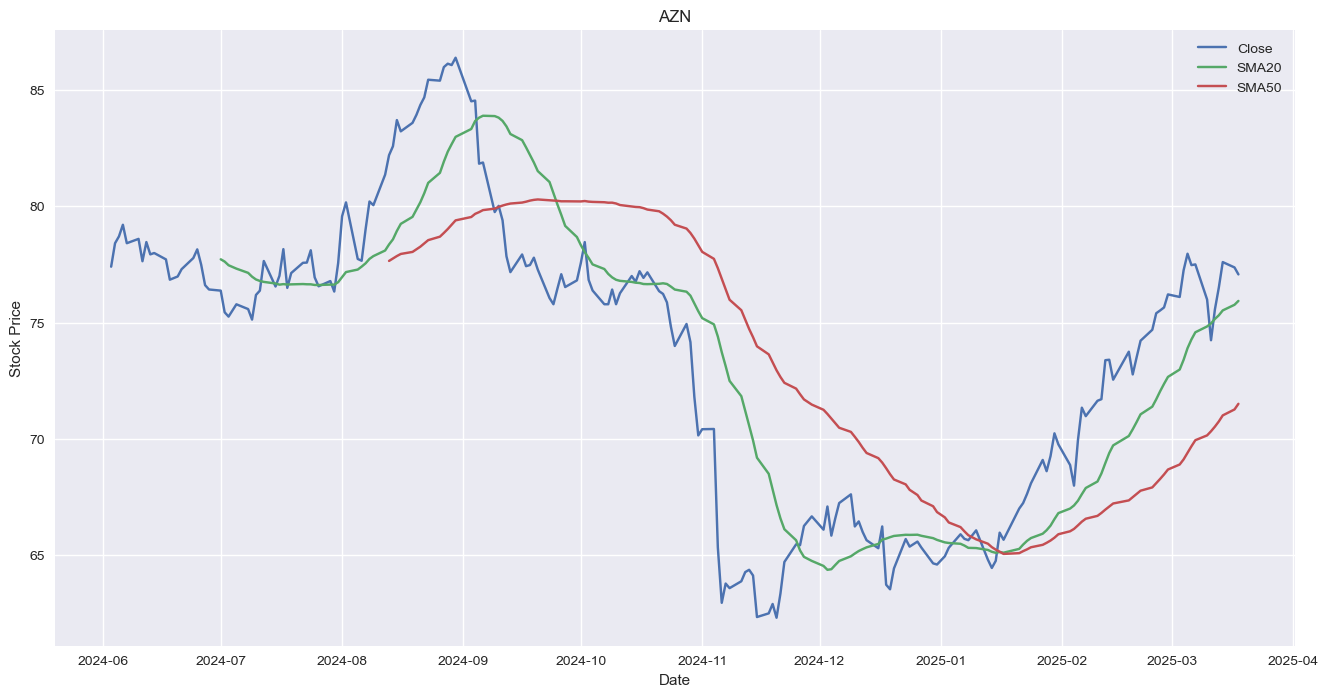

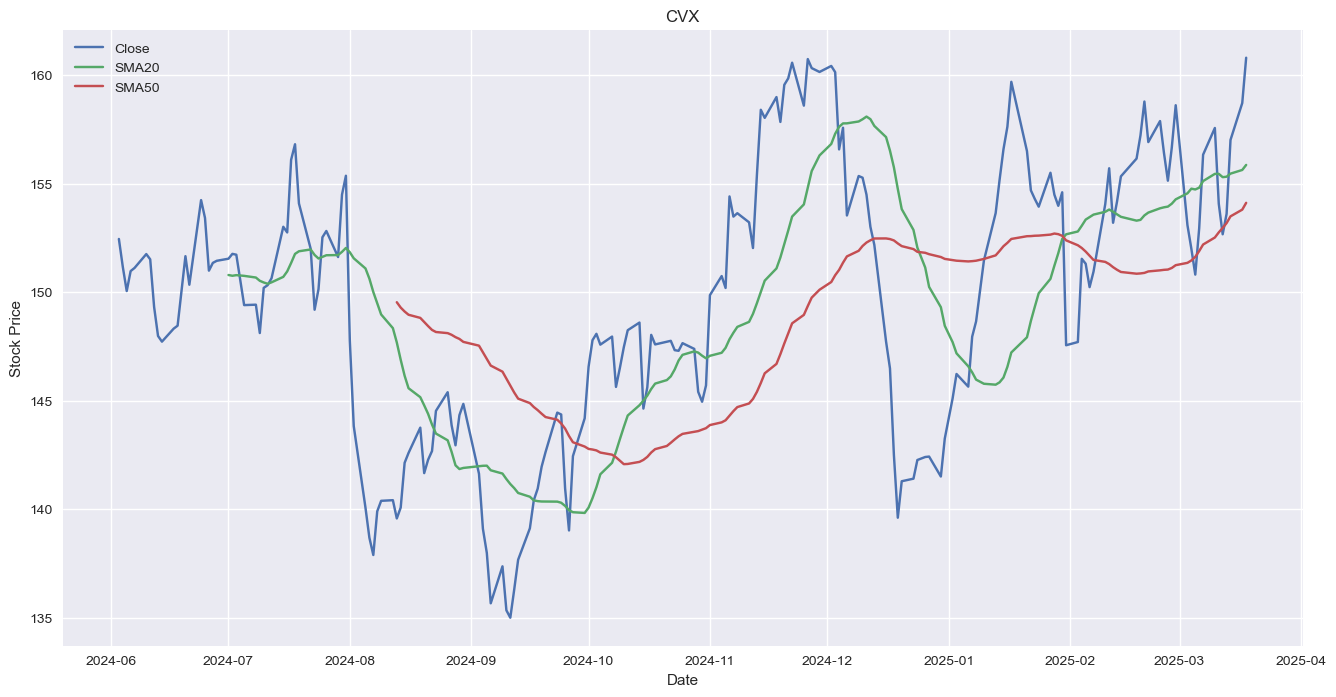

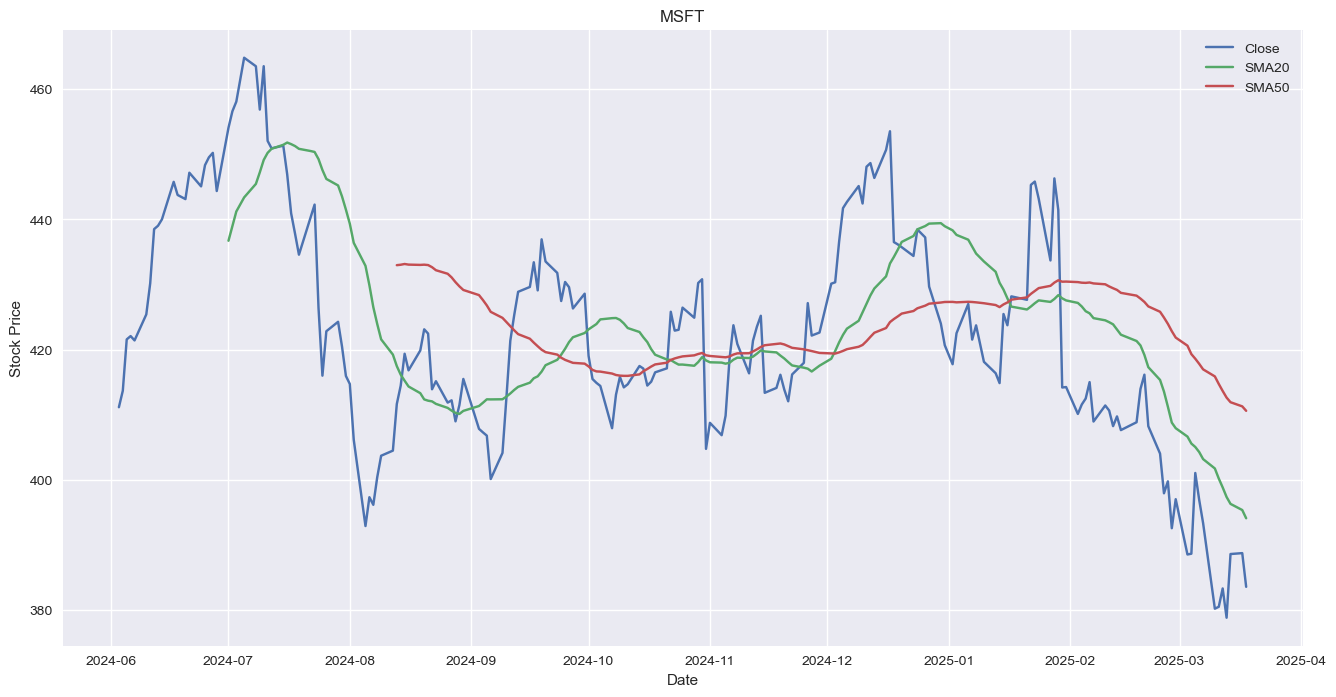

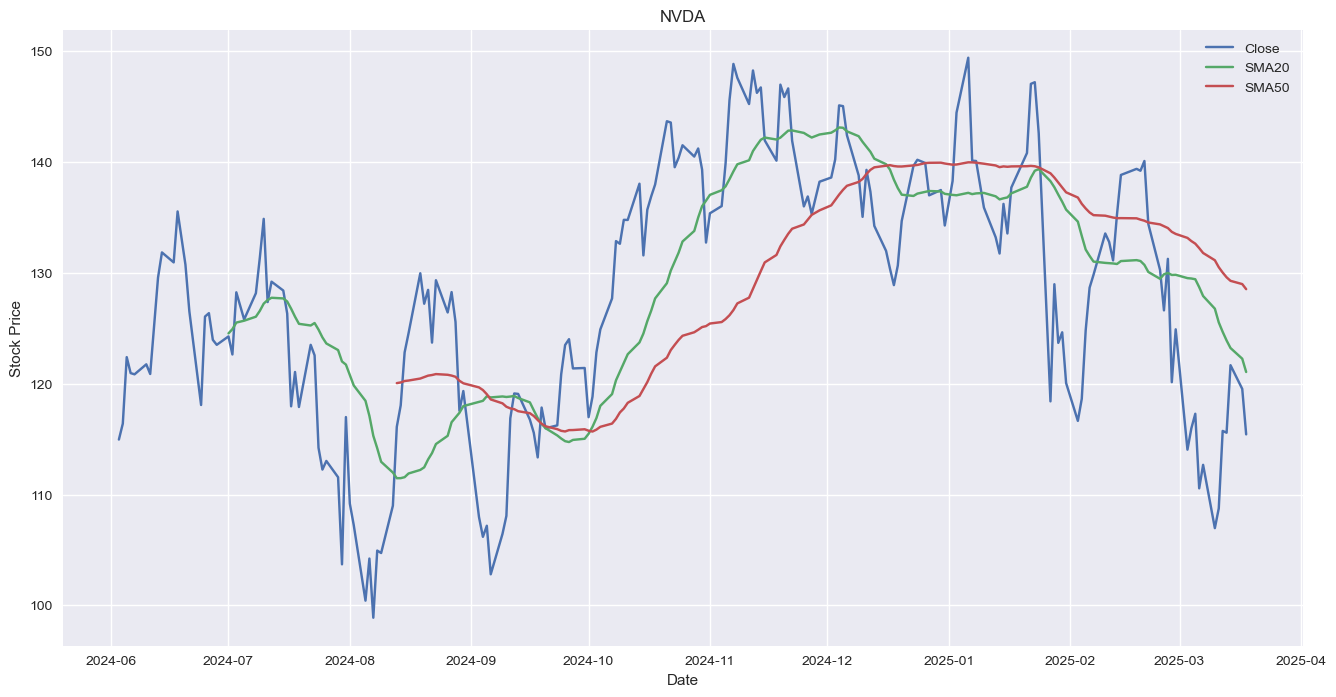

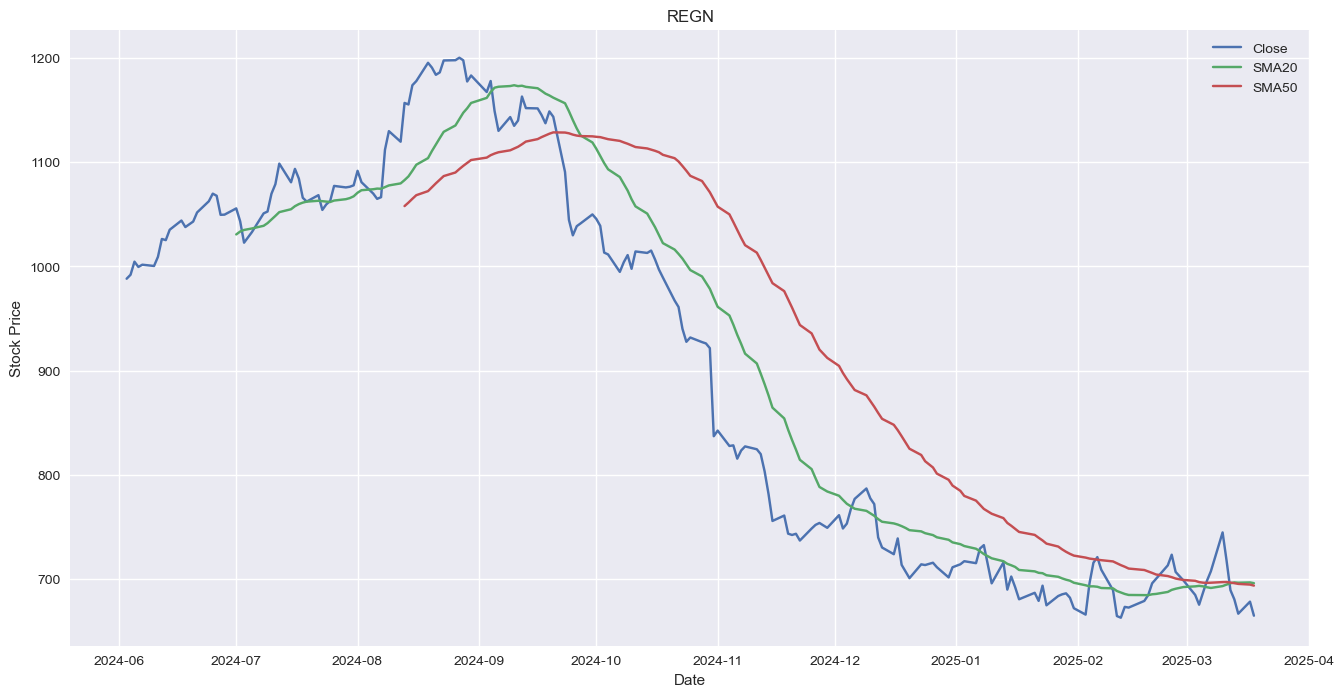

In [15]:
for col in closeFive.columns:
    plt.figure(figsize=(16, 8))
    plt.plot(closeFive.loc[:, col], label='Close')
    plt.plot(SMA20.loc[:, col], label='SMA20')
    plt.plot(SMA50.loc[:, col], label='SMA50')
    plt.legend()
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

# Cumulative returns and drawdowns

Before the next challenge, let's try creating visualizations of Apple's buy and hold as well as its drawdowns.

In [16]:
AAPL = yf.download('AAPL', end='2022-01-07')
AAPL

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2021-12-31,174.516266,176.147707,174.211584,175.027312,64062300
2022-01-03,178.879898,179.734947,174.653859,174.771790,104487900


In [17]:
aaplClose = AAPL.Close.copy()
aaplClose

Ticker,AAPL
Date,
1980-12-12,0.098726
1980-12-15,0.093575
1980-12-16,0.086707
1980-12-17,0.088853
1980-12-18,0.091429
...,...
2021-12-31,174.516266
2022-01-03,178.879898
2022-01-04,176.609650


In [18]:
# Log return using divide
aaplClose['dReturns'] = np.log(aaplClose.AAPL / aaplClose.AAPL.shift())
aaplClose.dropna(inplace=True)
aaplClose


Ticker,AAPL,dReturns
Date,,
1980-12-15,0.093575,-0.053581
1980-12-16,0.086707,-0.076231
1980-12-17,0.088853,0.024449
1980-12-18,0.091429,0.028580
1980-12-19,0.097009,0.059238
...,...,...
2021-12-31,174.516266,-0.003541
2022-01-03,178.879898,0.024697
2022-01-04,176.609650,-0.012773


In [19]:
# Cumulative returns
aaplClose['CumReturns'] = aaplClose.dReturns.cumsum().apply(np.exp)
aaplClose

Ticker,AAPL,dReturns,CumReturns
Date,,,
1980-12-15,0.093575,-0.053581,0.947829
1980-12-16,0.086707,-0.076231,0.878261
1980-12-17,0.088853,0.024449,0.899998
1980-12-18,0.091429,0.028580,0.926092
1980-12-19,0.097009,0.059238,0.982610
...,...,...,...
2021-12-31,174.516266,-0.003541,1767.684595
2022-01-03,178.879898,0.024697,1811.884060
2022-01-04,176.609650,-0.012773,1788.888592


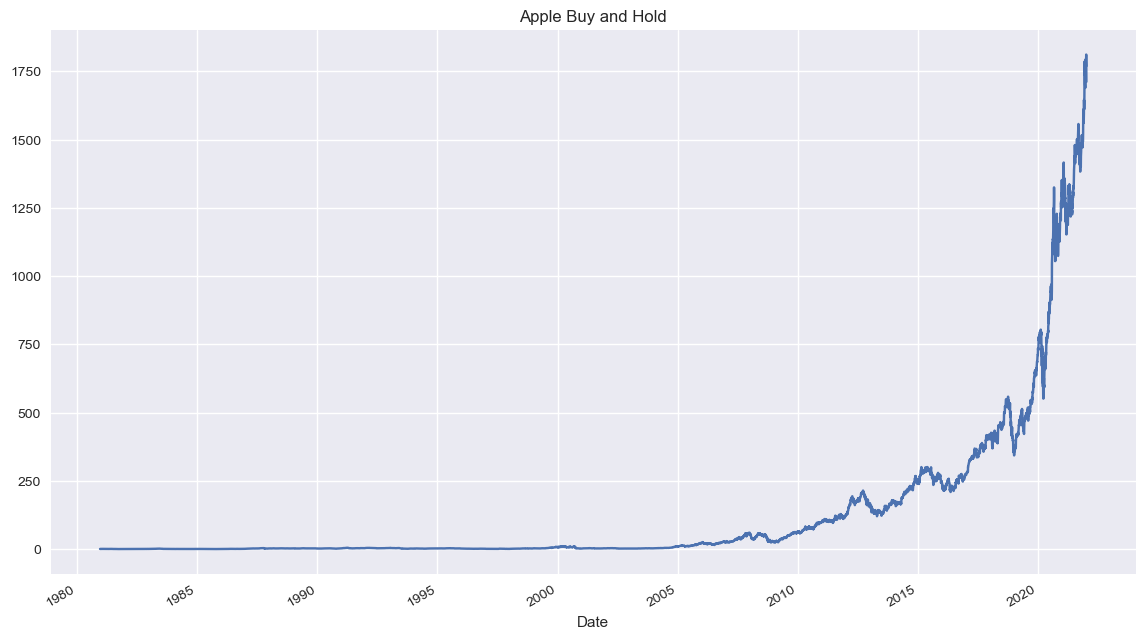

In [20]:
# Plotting buy and hold
aaplClose.CumReturns.plot(figsize=(14,8), title='Apple Buy and Hold')
plt.show()

In [21]:
# Calculating maximum cumulative returns
aaplClose['CumMax'] = aaplClose.CumReturns.cummax()
aaplClose

Ticker,AAPL,dReturns,CumReturns,CumMax
Date,,,,
1980-12-15,0.093575,-0.053581,0.947829,0.947829
1980-12-16,0.086707,-0.076231,0.878261,0.947829
1980-12-17,0.088853,0.024449,0.899998,0.947829
1980-12-18,0.091429,0.028580,0.926092,0.947829
1980-12-19,0.097009,0.059238,0.982610,0.982610
...,...,...,...,...
2021-12-31,174.516266,-0.003541,1767.684595,1795.160210
2022-01-03,178.879898,0.024697,1811.884060,1811.884060
2022-01-04,176.609650,-0.012773,1788.888592,1811.884060


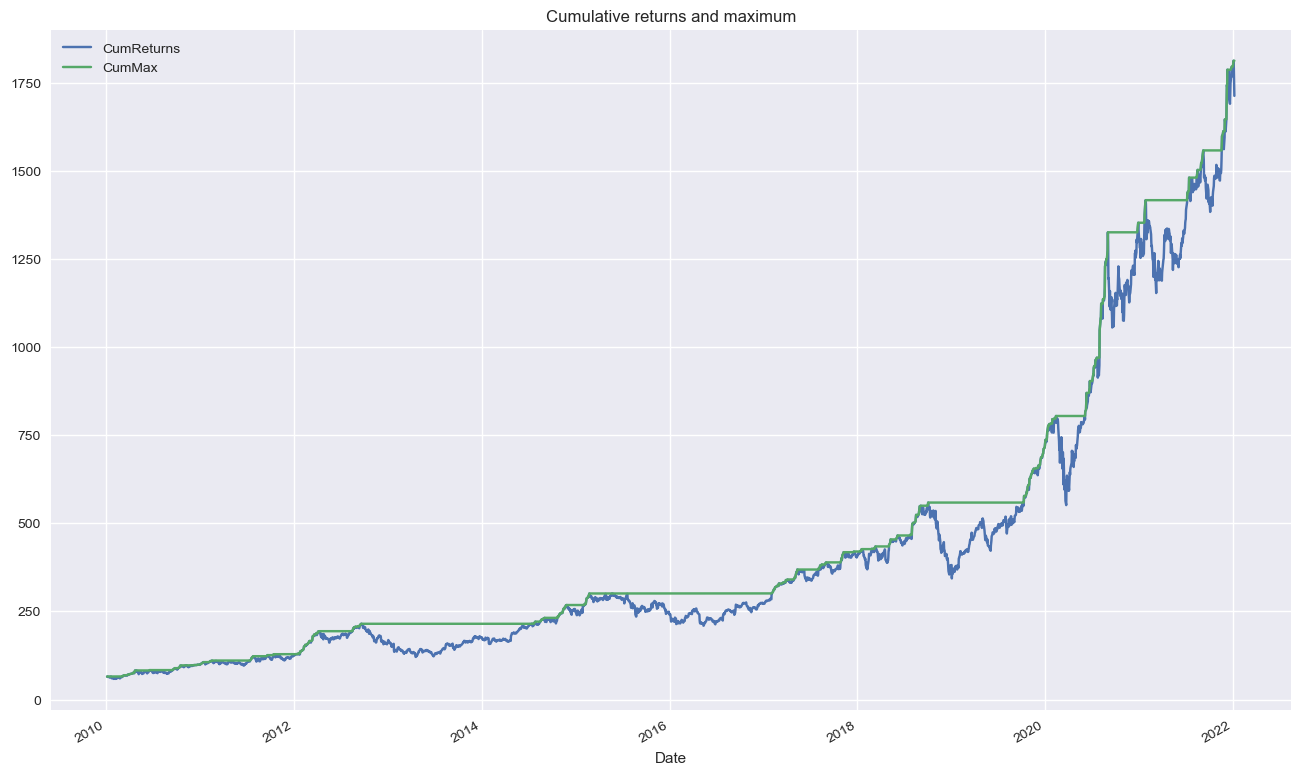

In [22]:
aaplClose.loc['2010-01-01':,['CumReturns', 'CumMax']].plot(figsize=(16, 10), title='Cumulative returns and maximum')
plt.legend()
plt.show()

In [23]:
# Calculating drawdowns
aaplClose['Drawdowns'] = aaplClose.CumMax - aaplClose.CumReturns
aaplClose

Ticker,AAPL,dReturns,CumReturns,CumMax,Drawdowns
Date,,,,,
1980-12-15,0.093575,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.086707,-0.076231,0.878261,0.947829,0.069568
1980-12-17,0.088853,0.024449,0.899998,0.947829,0.047831
1980-12-18,0.091429,0.028580,0.926092,0.947829,0.021737
1980-12-19,0.097009,0.059238,0.982610,0.982610,0.000000
...,...,...,...,...,...
2021-12-31,174.516266,-0.003541,1767.684595,1795.160210,27.475614
2022-01-03,178.879898,0.024697,1811.884060,1811.884060,0.000000
2022-01-04,176.609650,-0.012773,1788.888592,1811.884060,22.995468


In [24]:
aaplClose.Drawdowns.max()

np.float64(270.03264399713566)

In [25]:
Idx = aaplClose.Drawdowns.idxmax()
aaplClose[aaplClose.index<=Idx]

Ticker,AAPL,dReturns,CumReturns,CumMax,Drawdowns
Date,,,,,
1980-12-15,0.093575,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.086707,-0.076231,0.878261,0.947829,0.069568
1980-12-17,0.088853,0.024449,0.899998,0.947829,0.047831
1980-12-18,0.091429,0.028580,0.926092,0.947829,0.021737
1980-12-19,0.097009,0.059238,0.982610,0.982610,0.000000
...,...,...,...,...,...
2020-09-14,112.487373,0.029559,1139.390624,1325.272651,185.882027
2020-09-15,112.662910,0.001559,1141.168649,1325.272651,184.104002
2020-09-16,109.337807,-0.029958,1107.488495,1325.272651,217.784156


In [26]:
aaplClose['Drawdown %'] = aaplClose.Drawdowns / aaplClose.CumMax
aaplClose

Ticker,AAPL,dReturns,CumReturns,CumMax,Drawdowns,Drawdown %
Date,,,,,,
1980-12-15,0.093575,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.086707,-0.076231,0.878261,0.947829,0.069568,0.073398
1980-12-17,0.088853,0.024449,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.091429,0.028580,0.926092,0.947829,0.021737,0.022934
1980-12-19,0.097009,0.059238,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2021-12-31,174.516266,-0.003541,1767.684595,1795.160210,27.475614,0.015305
2022-01-03,178.879898,0.024697,1811.884060,1811.884060,0.000000,0.000000
2022-01-04,176.609650,-0.012773,1788.888592,1811.884060,22.995468,0.012691


# SMA Crossover strategy

In [27]:
# Determining position based on short-term SMA and long-term
def xoverPosition(sma_s, sma_l):
    return np.where(sma_s > sma_l, 1, -1)

In [28]:
apple = yf.download('AAPL', start='1991-01-01')
apple

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1991-01-02,0.309573,0.313131,0.298898,0.304235,154985600
1991-01-03,0.306014,0.314909,0.306014,0.309572,150180800
1991-01-04,0.307793,0.314909,0.306014,0.306014,141523200
1991-01-07,0.307793,0.322026,0.306014,0.306014,310800000
1991-01-08,0.307793,0.312241,0.302455,0.311351,218691200
...,...,...,...,...,...
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500
2025-03-13,209.679993,216.839996,208.419998,215.949997,61368300


In [29]:
data = apple.Close.copy()
data

Ticker,AAPL
Date,
1991-01-02,0.309573
1991-01-03,0.306014
1991-01-04,0.307793
1991-01-07,0.307793
1991-01-08,0.307793
...,...
2025-03-12,216.979996
2025-03-13,209.679993
2025-03-14,213.490005


In [30]:
# Define window for short-term and long-term SMA

sma_s = 50
sma_l = 100

In [31]:
data['sma_s'] = data.AAPL.rolling(sma_s).mean()
data['sma_l'] = data.AAPL.rolling(sma_l).mean()
data

Ticker,AAPL,sma_s,sma_l
Date,,,
1991-01-02,0.309573,NaN,NaN
1991-01-03,0.306014,NaN,NaN
1991-01-04,0.307793,NaN,NaN
1991-01-07,0.307793,NaN,NaN
1991-01-08,0.307793,NaN,NaN
...,...,...,...
2025-03-12,216.979996,236.477139,236.274568
2025-03-13,209.679993,235.564553,236.058658
2025-03-14,213.490005,234.795892,235.877156


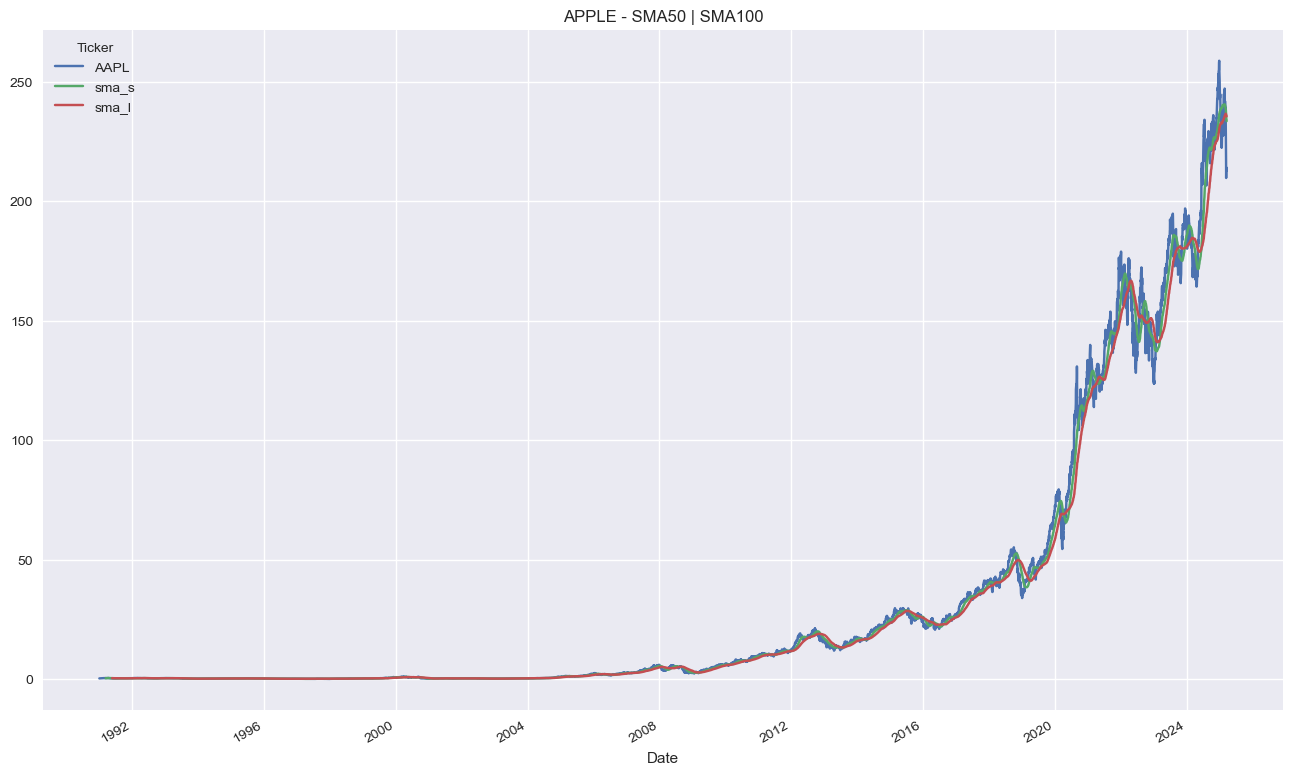

In [32]:
data.plot(figsize=(16, 10), title=f'APPLE - SMA{sma_s} | SMA{sma_l}')
data.dropna(inplace=True)
plt.show()

In [33]:
data['Position'] = xoverPosition(data.sma_s, data.sma_l)
data

Ticker,AAPL,sma_s,sma_l,Position
Date,,,,
1991-05-23,0.322636,0.426927,0.409797,1
1991-05-24,0.327998,0.424180,0.409981,1
1991-05-28,0.328892,0.421309,0.410210,1
1991-05-29,0.336042,0.418366,0.410492,1
1991-05-30,0.340510,0.415263,0.410819,1
...,...,...,...,...
2025-03-12,216.979996,236.477139,236.274568,1
2025-03-13,209.679993,235.564553,236.058658,-1
2025-03-14,213.490005,234.795892,235.877156,-1


[]

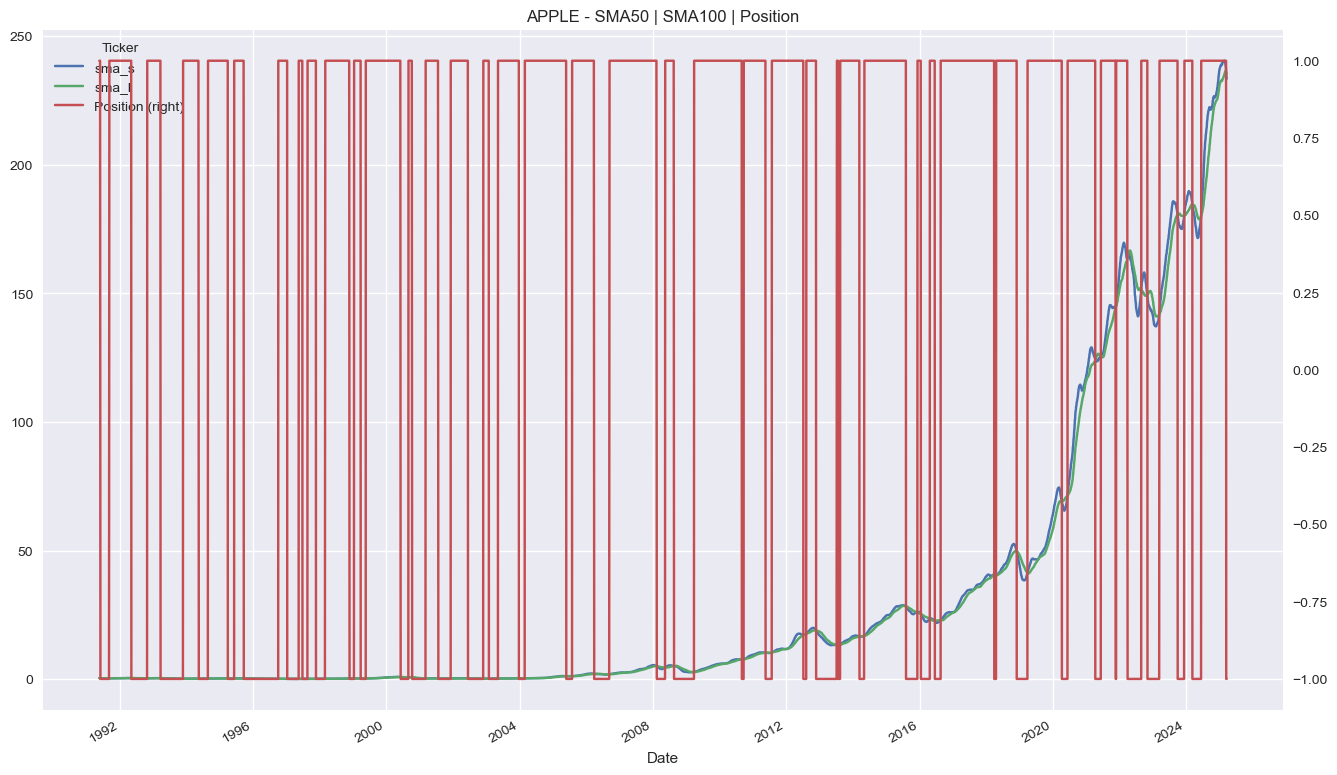

In [34]:
data.loc[:, ['sma_s', 'sma_l', 'Position']].plot(figsize=(16,10), title=f'APPLE - SMA{sma_s} | SMA{sma_l} | Position', secondary_y='Position')
plt.plot()

In [35]:
# Calculating Buy & Hold and Strategy returns
data.loc[:, 'B&H return'] = np.log(data.AAPL / data.AAPL.shift())
data.loc[:, 'Strategy return'] = data['B&H return'] * data.Position.shift()
data.dropna(inplace=True)
data


Ticker,AAPL,sma_s,sma_l,Position,B&H return,Strategy return
Date,,,,,,
1991-05-24,0.327998,0.424180,0.409981,1,0.016483,0.016483
1991-05-28,0.328892,0.421309,0.410210,1,0.002721,0.002721
1991-05-29,0.336042,0.418366,0.410492,1,0.021507,0.021507
1991-05-30,0.340510,0.415263,0.410819,1,0.013210,0.013210
1991-05-31,0.336042,0.412321,0.411102,1,-0.013210,-0.013210
...,...,...,...,...,...,...
2025-03-12,216.979996,236.477139,236.274568,1,-0.017633,-0.017633
2025-03-13,209.679993,235.564553,236.058658,-1,-0.034223,-0.034223
2025-03-14,213.490005,234.795892,235.877156,-1,0.018007,-0.018007


In [36]:
# Calculating total log returns
data[['B&H return', 'Strategy return']].sum()

Ticker
B&H return         6.491066
Strategy return    1.558956
dtype: float64

In [37]:
# Calculating what $1 will be
data[['B&H return', 'Strategy return']].sum().apply(np.exp)

Ticker
B&H return         659.225685
Strategy return      4.753853
dtype: float64

In [38]:
# Calculating standard deviation
data[['B&H return', 'Strategy return']].std() * np.sqrt(252)

Ticker
B&H return         0.429472
Strategy return    0.429632
dtype: float64

The above strategy simply goes long when our short-window SMA is above our long-window SMA, and short in the opposite case. However, if we analyze the growth of Apple's stock, we notice a clear upward trend. Let's modify our strategy to be long biased and simply sell instead of short when the short-window SMA drops below the long-window SMA.

### SMA crossover with long-bias

In [39]:
# Define function with long bias
def xoverPositionLB(sma_s, sma_l):
    return np.where(sma_s > sma_l, 1, 0)

data

Ticker,AAPL,sma_s,sma_l,Position,B&H return,Strategy return
Date,,,,,,
1991-05-24,0.327998,0.424180,0.409981,1,0.016483,0.016483
1991-05-28,0.328892,0.421309,0.410210,1,0.002721,0.002721
1991-05-29,0.336042,0.418366,0.410492,1,0.021507,0.021507
1991-05-30,0.340510,0.415263,0.410819,1,0.013210,0.013210
1991-05-31,0.336042,0.412321,0.411102,1,-0.013210,-0.013210
...,...,...,...,...,...,...
2025-03-12,216.979996,236.477139,236.274568,1,-0.017633,-0.017633
2025-03-13,209.679993,235.564553,236.058658,-1,-0.034223,-0.034223
2025-03-14,213.490005,234.795892,235.877156,-1,0.018007,-0.018007


In [40]:
data['PositionLB'] = xoverPositionLB(data.sma_s, data.sma_l)
data['StrategyLB return'] = data['PositionLB'] * data['B&H return']
data

Ticker,AAPL,sma_s,sma_l,Position,B&H return,Strategy return,PositionLB,StrategyLB return
Date,,,,,,,,
1991-05-24,0.327998,0.424180,0.409981,1,0.016483,0.016483,1,0.016483
1991-05-28,0.328892,0.421309,0.410210,1,0.002721,0.002721,1,0.002721
1991-05-29,0.336042,0.418366,0.410492,1,0.021507,0.021507,1,0.021507
1991-05-30,0.340510,0.415263,0.410819,1,0.013210,0.013210,1,0.013210
1991-05-31,0.336042,0.412321,0.411102,1,-0.013210,-0.013210,1,-0.013210
...,...,...,...,...,...,...,...,...
2025-03-12,216.979996,236.477139,236.274568,1,-0.017633,-0.017633,1,-0.017633
2025-03-13,209.679993,235.564553,236.058658,-1,-0.034223,-0.034223,0,-0.000000
2025-03-14,213.490005,234.795892,235.877156,-1,0.018007,-0.018007,0,0.000000


In [41]:
# Total log returns
data[['B&H return', 'Strategy return', 'StrategyLB return']].sum()

Ticker
B&H return           6.491066
Strategy return      1.558956
StrategyLB return    4.227300
dtype: float64

In [42]:
# What $1 would be
data[['B&H return', 'Strategy return', 'StrategyLB return']].sum().apply(np.exp)

Ticker
B&H return           659.225685
Strategy return        4.753853
StrategyLB return     68.531941
dtype: float64

In [43]:
# Risk (std)
data[['B&H return', 'Strategy return', 'StrategyLB return']].std() * np.sqrt(252)

Ticker
B&H return           0.429472
Strategy return      0.429632
StrategyLB return    0.332796
dtype: float64

Clearly, this strategy works better as we multiply our profits by a large factor and reduce the risk we face. Now let's calculate the drawdowns of each strategy. First we'll plot our growth with each of the 3 strategies.

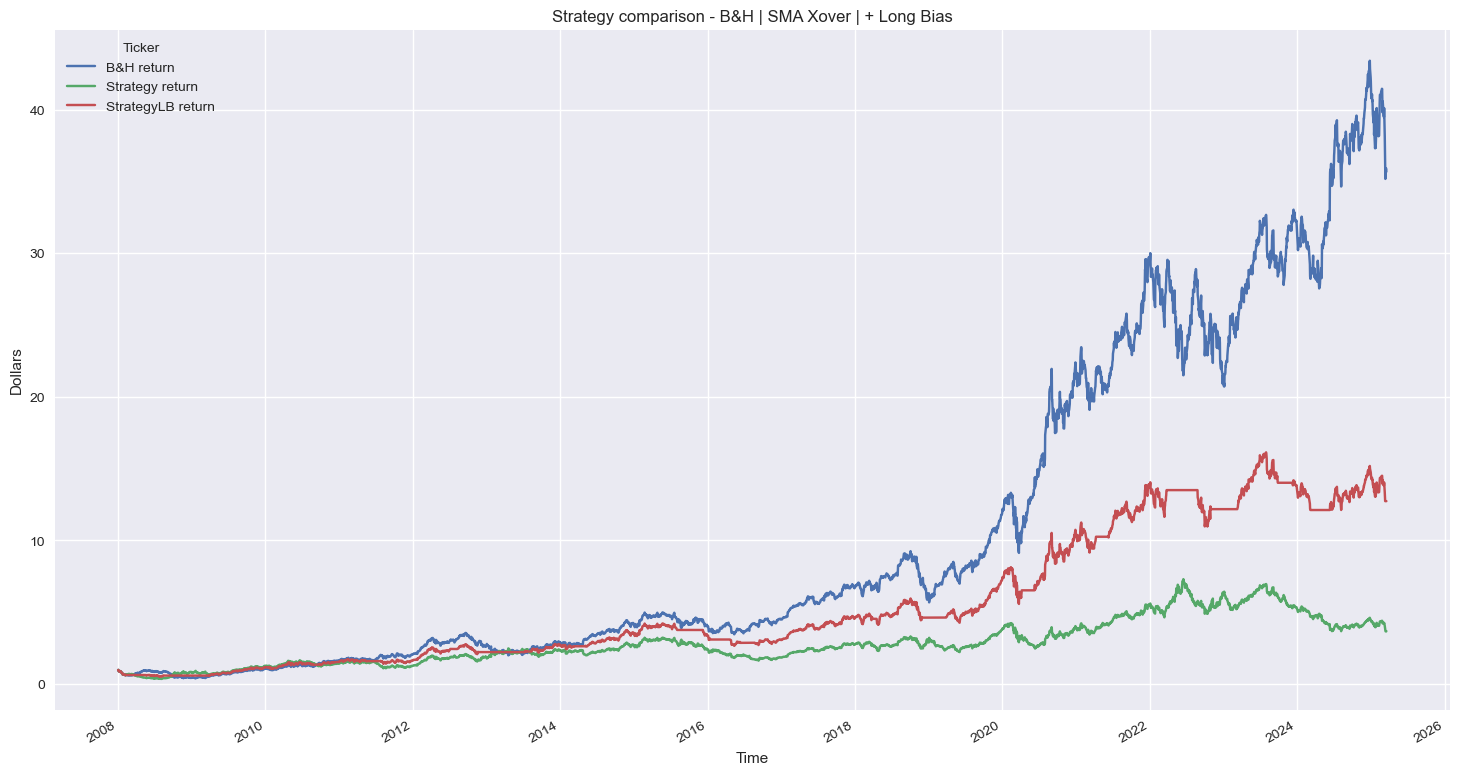

In [53]:
data.loc['2008':,['B&H return', 'Strategy return', 'StrategyLB return']].cumsum().apply(np.exp).plot(figsize=(18,10), title=f'Strategy comparison - B&H | SMA Xover | + Long Bias')
plt.xlabel('Time')
plt.ylabel('Dollars')
plt.show()

Just from visually analyzing this chart, we notice that the LB strategy avoids quite a few losses (look for the plateaus). The base crossover strategy also seems to soften some losses, but it's hard to tell. Let's quantify this.

In [72]:
# Calculating drawdowns
cumreturns = data[['B&H return', 'Strategy return', 'StrategyLB return']].cumsum().apply(np.exp)
drawdowns = cumreturns.cummax() - cumreturns
drawdowns

Ticker,B&H return,Strategy return,StrategyLB return
Date,,,
1991-05-24,0.000000,0.000000,0.000000
1991-05-28,0.000000,0.000000,0.000000
1991-05-29,0.000000,0.000000,0.000000
1991-05-30,0.000000,0.000000,0.000000
1991-05-31,0.013850,0.013850,0.013850
...,...,...,...
2025-03-12,129.419828,4.430027,18.282807
2025-03-13,152.045948,4.597909,18.282807
2025-03-14,140.236939,4.683965,18.282807


In [73]:
drawdowns[['B&H %', 'Strategy %', 'StrategyLB %']] = drawdowns / cumreturns.cummax() * 100
drawdowns


Ticker,B&H return,Strategy return,StrategyLB return,B&H %,Strategy %,StrategyLB %
Date,,,,,,
1991-05-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-05-31,0.013850,0.013850,0.013850,1.312269,1.312269,1.312269
...,...,...,...,...,...,...
2025-03-12,129.419828,4.430027,18.282807,16.138299,47.027869,21.059564
2025-03-13,152.045948,4.597909,18.282807,18.959714,48.810046,21.059564
2025-03-14,140.236939,4.683965,18.282807,17.487163,49.723599,21.059564


In [74]:
drawdowns.max()

Ticker
B&H return           171.390684
Strategy return        4.695252
StrategyLB return     21.606717
B&H %                 81.801448
Strategy %            96.212023
StrategyLB %          82.550795
dtype: float64

We see that our long bias strategy's drawdowns are actually slightly greater than simply buying and holding. However, the original crossover strategy's drawdowns are the worst of the three, so LB is at least a little bit better in terms of riskiness.